# POE user analyzing project
###### **Data reference and questions are here: https://www.kaggle.com/datasets/gagazet/path-of-exile-league-statistic**

---
Hi, I'm Angela. 😊 I'm a novice in data analysis.  I'm a novice in data analysis. I'm interested in the video games, mobility, culture, and content industry. I hope to become a data scientist with anomaly detection and anti-cheating. I hope that my analysis will have a positive impact on the world at least a little bit.  

This is my first Kaggle-data analyzing project on my own. I played(?) with this data for almost a month or more freely, and I finish it to start to answer these questions partially. Finally, I can close the analysis joyfully.
I analyzed this data set with my thoughts and what I learned (as if I were a game analyst 😆).  
_ps. English may seem a little awkward because it is not my first language. I'm sorry. And I used the word 'average' more than the word 'mean' because I wanted to communicate more clearly in my hectic writing. 'mean' is so mean to 'average', 'mean' means 'mean' and... just joking._ 🤪

---
##### **Questions for participants**

1. A total number of players in each division, usage of each class in descending order.
2. Some of the players streaming their game (twitch column). Do they play better than people, who does not?
3. Predict chance to be at top 30 in each division, if we are Necromancer. With and without stream.
4. Average number of finished challanges for each division, show division with highest and lowest average challanges.
5. Show dependency between level and class of died characters. Only for HC divisions.


## Importing Data and Libraries
---

In [1]:
import pandas as pd
import numpy as np

import time as time
import matplotlib.pyplot as plt
import seaborn as sns

# import sklearn as sk
# import tensorflow as tf
# import keras

np.random.seed(0)
# tf.random.set_seed(0)

# version check
print(sns.__version__)
print(pd.__version__)
print(np.__version__)
# print(sk.__version__)
# print(tf.__version__)
# print(keras.__version__)

data = pd.read_csv("poe_stats.csv")

0.11.2
1.5.3
1.22.4


In [2]:
df = data
df.head()

,rank,dead,online,name,level,class,id,experience,account,challenges,twitch,ladder
0,1,False,False,Tzn_NecroIsFineNow,100,Necromancer,3dcddd59f5088893f734f39686350990dae168cc4f4b00...,4250334444,TheTzn,40,thetzn,Harbinger
1,1,False,False,RaizNeverFirstQT,100,Necromancer,8f3216db5ac9106c287a834731aafc83c387138f28fc45...,4250334444,RaizQT,22,raizqt,SSF Harbinger HC
2,1,False,False,GucciStreamerAdvantage,100,Necromancer,c6ec2dae3855c551e0597c06ef2da06fbb5512487ded7f...,4250334444,GucciPradas,35,guccipradas,Hardcore Harbinger
3,1,False,False,ChiroxPrime,100,Slayer,c861372da792be0b22c45bf437ccd58437c52e9455e0bf...,4250334444,Chiroxun,26,NaN,SSF Harbinger
4,2,False,False,Cool_NecroIsFineNow,100,Deadeye,24ae924ceed7989ef3d3d6772612832bb467a6094352c7...,4250334444,cooltail,22,NaN,Harbinger


## Data summary

In [3]:
# options about float

pd.options.display.float_format = '{:,.2f}'.format
df.describe()

,rank,level,experience,challenges
count,"59,776.00","59,776.00","59,776.00","59,776.00"
mean,"7,495.37",85.42,"1,825,786,027.36",25.76
std,"4,330.18",11.29,"1,094,747,934.61",8.44
min,1.00,53.00,"77,909,816.00",4.00
25%,"3,745.00",78.00,"777,469,746.25",19.00
50%,"7,492.00",90.00,"1,934,009,687.00",25.00
75%,"11,247.00",95.00,"2,876,116,901.00",33.00
max,"15,000.00",100.00,"4,250,334,444.00",40.00


In [4]:
df.describe(include = 'object')

,name,class,id,account,twitch,ladder
count,59776,59776,59776,59776,16300,59776
unique,58286,26,59776,37123,9613,4
top,_Flic_,Berserker,3dcddd59f5088893f734f39686350990dae168cc4f4b00...,chuz101,thespunkylobster,SSF Harbinger
freq,14,8711,1,30,18,14981


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59776 entries, 0 to 59775
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rank        59776 non-null  int64 
 1   dead        59776 non-null  bool  
 2   online      59776 non-null  bool  
 3   name        59776 non-null  object
 4   level       59776 non-null  int64 
 5   class       59776 non-null  object
 6   id          59776 non-null  object
 7   experience  59776 non-null  int64 
 8   account     59776 non-null  object
 9   challenges  59776 non-null  int64 
 10  twitch      16300 non-null  object
 11  ladder      59776 non-null  object
dtypes: bool(2), int64(4), object(6)
memory usage: 4.7+ MB


# 4. The average number of "finished" challenges 
---
##### Q4. The average number of finished challenges for each division shows the division with the highest and lowest average challenges.

This question is clear, thankfully. I'll separate the division and calculate the average challenges.  
But we have to think about the word "finished". "finished" challenges would mean "dead" characters, but there are no dead characters in the modes which are not 'Hardcore' mode.  

So I got the values with 'dead' characters in HC modes('Hardcore Harbinger', 'SSF Harbinger HC') and got the values with all characters in other modes. 

## 4-1. challenges distribution
First, let's see the average, maximum and minimum number of challenges.

In [6]:
# simple avg, max and min about all characters
df.groupby(by = 'ladder')[['challenges']].agg(['mean', 'max', 'min'])

challenges        
                         mean max min
ladder                               
Harbinger               33.47  40  13
Hardcore Harbinger      27.17  40   8
SSF Harbinger           22.15  40   9
SSF Harbinger HC        20.29  40   4

#### [graph 4-1] Violin plot about Challenges by ladder

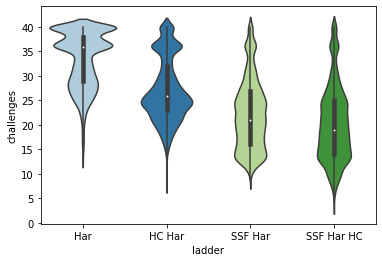

In [7]:
# visualizing the average
plt.rcParams["figure.figsize"] = (6, 6)
sns.violinplot(data = df.sort_values(by = 'ladder'), x = 'ladder', y = 'challenges', palette = 'Paired')
plt.xticks(ticks = [i for i in range(4)], labels = ['Har', 'HC Har', 'SSF Har', 'SSF Har HC'])

plt.show()

In [8]:
# data preparing
# if not HC mode, commit the dead column

df1 = df[['dead', 'ladder', 'challenges']].copy()
print(df1['dead'].sum())
df1.loc[df1['ladder'] == 'Harbinger', 'dead'] = True
df1.loc[df1['ladder'] == 'SSF Harbinger', 'dead'] = True
print(df1['dead'].sum())

20581
50480


## [Answer]: highest and lowest average challenge of finished challenge by division
where is highest and lowest average? 

In [9]:
df1[df1['dead'] == True].groupby('ladder')['challenges'].agg(['mean', 'max', 'min']).sort_values(['mean'], ascending = False)

,mean,max,min
ladder,,,
Harbinger,33.47,40,13
Hardcore Harbinger,27.23,40,12
SSF Harbinger,22.15,40,9
SSF Harbinger HC,19.97,40,4


In [10]:
print('Highest average challenges:', 
      df1[df1['dead'] == True].groupby('ladder')['challenges'].agg(['mean', 'max', 'min']).sort_values(['mean'], ascending = False).index[0])
print('Lowest average challenges:', 
      df1[df1['dead'] == True].groupby('ladder')['challenges'].agg(['mean', 'max', 'min']).sort_values(['mean'], ascending = False).index[-1])

Highest average challenges: Harbinger
Lowest average challenges: SSF Harbinger HC


## 4-2. results:
The challenge numbers are lower in Hardcore mode. SSF modes are lower than other modes.  

1. Hardcore mode has characters' death. Therefore they must be stopped one day. So they'll do their best carefully and harder each time of challenge. (It means each challenge is burdensome and stressful.)  
2. It seems single-player modes are more exhausting than multi-player modes. There are no motivating factors except himself and his results. They fight all by themselves without any allies. Maybe it makes them give up on doing it 'one more time'.  

Actually, these are regardless of the numbers above. The insight-able result needs more knowledge of the game. I'm bad to couldn't imagine the gap between one or two times challenges. If you know about this, please write a comment, I'd really appreciate that.  

# 5. Is the class of the dead characters related to level?
---
##### Q5. Show dependency between level and class of dead characters. Only for HC divisions.
**Show dependency between level and class of died characters. Only for HC divisions.**

I thought deeply about the question. *Does 'Show dependency ~' this phrase already suppose that the level and class have a dependency on each other before analyzing so far?*
So I tried to judge by some statistical methods whether they have a dependency. Then I explained(showed) it using logic about the game and stat results.

If I were a game data analyst, after a little more deeply thinking about this question, I would understand this question as the relation between the dead characters' class and the level. And I assumed that the intention of it is searching for some reason why the dead characters are dead. 

One of the ideas that came up as a thinking might have been a level or class issue. Maybe it was digging into only Hardcore modes to solve a problem in limited data. Because this data is limiting for analyzing the in-game situations(like losing HP or environment) or numerous combinations of skills and equipment.

Someone can think that the death is related to just level(user's ability), maybe the class is the problem or both. However, I think this is something to be careful about in the process of asking questions before understanding the analysis properly. It can be a meaningless analysis that gets biased answers or rechecks the predicted results If we rely on predictions without careful planning. Death is just 'the death' and it could be related to just one of them or neither, we have to be beware when analyzing a problem kind of this.
For example, even if there's a relation between them, it is possible that the relationship is caused by the difficulty of piloting the class, regardless of the class's performance(It might be the problem between 'class' and 'level' which is discovered in every 'ladder'.).

In other words, the analysis of this question is not the end. It can be an insufficient question to make a decision and I think it is a step in the analysis process of big flows. The interpretation of this question and analysis I think is as follows.

- If there is a correlation between level and class in dead characters, we can start to look for something that could reveal the end(death) of the characters by analyzing relativeness with level or class.
- On the other hand, if there's no or low dependency between level and class, we can only know that the preference by level about the classes in HC mode(especially for dead characters) doesn't exist. (It could be called a 'well-balanced' game which not makes users' resist or favoritism.)

Before checking the dependency, I looked at some of the levels and classes statistically for the dead characters.

---

The methods which can get the dependency,
1. getting a correlation between level and class.
2. comparing the average level by each class and one-way ANOVA

And I imagined also this: make a machine learning model with class and level, and watch whether the model can predict the class just with level! I'm a little bit sorry for the computer but the computer can't do that.

## 5-1. distribution and data preprocessing
### (1) ratio of dead characters

I looked at the hardcore mode of the percentage of dead characters. It seems that the proportion of characters who haven't finished the long long battle yet is not small.

In [11]:
# dataframe contains only hardcore modes
df_hc = df.loc[df['ladder'].isin(['SSF Harbinger HC', 'Hardcore Harbinger'])]

# dead characters rate
df_hc.pivot_table(index = 'ladder', values = 'dead')

,dead
ladder,
Hardcore Harbinger,0.63
SSF Harbinger HC,0.74


### (2) all/dead characters’ level distribution in Hardcore mode

In [12]:
a = df_hc['level'].describe().rename('a')
d = df_hc[df_hc['dead'] == True]['level'].describe().rename('d')
ad = pd.concat([a, d], axis = 1)
ad.rename(columns = {'a':'all', 'd':'dead'}, inplace = True)
ad

,all,dead
count,"29,877.00","20,581.00"
mean,81.47,80.23
std,12.78,13.03
min,53.00,53.00
25%,71.00,69.00
50%,89.00,88.00
75%,91.00,91.00
max,100.00,100.00


We looked at the level distribution of dead characters. 80 is the average, and the median is about 88. As a result of checking with the graph, it is distributed a lot in the high level section.  

If you think this game mode itself is a "challenging place, a place to test limits," it is no wonder that most characters have high levels. As you see in the values of ‘all’ characters in the mode, it's not because of the high level, but because there are many high-level characters who are challenging the mode.  

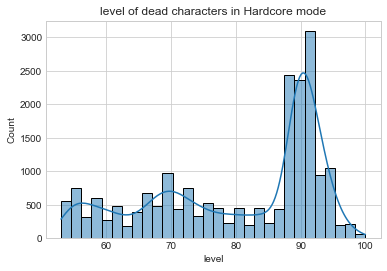

In [13]:
# dead characters data frame with the level data
df_dead = df_hc.loc[df['dead'] == True][['class', 'level']]


plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 10
plt.style.use("seaborn-whitegrid")
plt.rcParams['axes.facecolor']='white'

plt.figure(figsize = (6, 4))
sns.histplot(x = df_dead['level'], palette = 'Paired', kde = True)
plt.title("level of dead characters in Hardcore mode")
plt.show()

Many people already know that **the minimum 'level'** of users in each mode is 53 before reaching this question.

<br>

### (3) Average level of dead characters by class
I visualized the average level of dead characters by class.

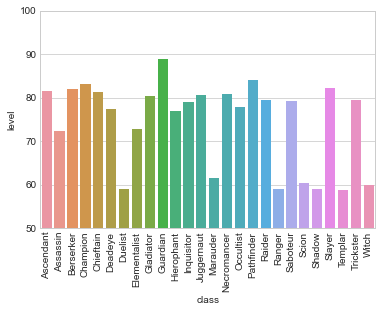

In [14]:
plt.figure(figsize = (6, 4))
plt.xticks(rotation = 90)
plt.ylim(50, 100)
df_hc_lev_mean = df_dead.groupby('class')[['level']].mean()
sns.barplot(data = df_hc_lev_mean, x = df_hc_lev_mean.index, y = 'level')
plt.show()

### (4) **About the average graph, and the important point: Ascendancy Classes and Pre-Ascendancy Classes**

##### What we know from the graph: **The average level of Duelist, Marauder, Ranger, Scion, Templar and Witch is markedly small.**  
As you know, 'Duelist', 'Marauder', 'Ranger', 'Scion', 'Templar', and 'Witch' are <span style="color:limegreen">*__root classes__*</span>*(I named 'Pre-Ascendancy Classes'. I’ll use this name in this documents.)* of 19 <span style="color:hotpink">*__Ascendancy classes__*</span>.  
To add to the explanation, it probably has differences between all of these classes. Perhaps if we do ANOVA with all of these classes, it will be different, and if we do all the post-hoc comparison results, we will see a difference in these classes(especially with root classes).  

In other words, some classes' level is indeed lower, strictly speaking, but I don't think that means exactly ‘level’ correlates with ‘class’. The point is, I thought the questioner didn't make the question to ask an easy question.    
It just seems each mode had a constraint on the level to enter the mode, and the minimum level for who could play the modes is inferred 53.  

<br>
 As [Path Of Exile Official documents](https://www.pathofexile.com/ascendancy/classes), "Upon completing the Lord's Labyrinth for the first time, you can pick an Ascendancy class from one of the three available for your class. The first time you complete the Labyrinth on each difficulty, you will receive two Ascendancy Points for its skill tree.".

I tried setting the skill trees for this part on the official homepage, and I found it has high degrees of freedom. In other words, most of them are playing games in a changed class(Ascendancy class) to meet the utility(or performance) they want. 

<br>
Of the approximately 30,000 rank data, it makes sense that the 293 root class characters in this ranking list have a lower average. They just didn't finish the Labyrinth. Their level will be higher than this when they finish the Labyrinth and be the ascendancy classes. Of course, they are indeed excellent at playing POE because they’re ranked with other ascendancy classes.  

<br>
If we are the game data analyst, we must keep in view whether their level(lv.53) and the class is "by their will or not".  
The probability of a case that some aces(People with higher skills than the level indicated by numbers) play the game with root classes for fun or desire. And it would be that some aces can play the game without applying the "Ascendency Point" they get after completing the maze to play at a difficult level.  

_From the perspective of gamers, if we think a little more, we could notice that the case would be there considerably much that already experienced users want to get a high rank with a fresh character for some reason.
(And when their class is matched with popular classes in the version(patch) of the game... The possibility that a scenario would be right is high.-for example, specific classes are over-power in the mode-)_

---


Anyway, because I had to prove whether it was dependent I did an ANOVA test. \ (^0^\ ) =33

### analysis process plan:
I set the plan like this above:
1. getting a correlation between level and class.
2. comparing the average level by each class and one-way ANOVA   

But! I noticed the problem with the level diff between Ascendancy classes and root classes. So I decided to divide the plan like this:

1. correlation [5-1-(5)]
    1. regardless of *root classes*
    2. without *root classes*
2. ANOVA test [5-2]
    1. regardless of *root classes*
    2. without *root classes*
3. (additional analysis) grouping all by *root classes* to 7 clusters. [5-3]
    1. correlation
    2. ANOVA

In my opinion, the ANOVA test is quite strict, so the result composited by all classes is a little ambiguous when we care about Ascendancy classes and root classes’ diff. So, I looked at the mean and standard deviation of *root classes* and *ascendancy classes* first.  

And I'll proceed following the process plan.

In [15]:
# we can see the difference between 'Root classes' and 'Ascendancy classes'

# 'root classes'
rootclasses = ['Duelist', 'Marauder', 'Ranger', 'Scion', 'Shadow', 'Templar', 'Witch']

# division01: not 'Ascending Classes' ('root classes')
rt = df_dead.loc[df_dead['class'].isin(rootclasses)].describe()

# division02: 'Ascending Classes'
ac = df_dead.loc[~df_dead['class'].isin(rootclasses)].describe()

# concatenating
rtac = pd.concat([rt, ac, d], axis = 1)
rtac.columns = ['root_classes', 'Ascd_classes', 'all']
rtac

,root_classes,Ascd_classes,all
count,321.00,"20,260.00","20,581.00"
mean,59.79,80.55,80.23
std,6.44,12.85,13.03
min,53.00,53.00,53.00
25%,55.00,70.00,69.00
50%,58.00,89.00,88.00
75%,63.00,91.00,91.00
max,89.00,100.00,100.00


### (5) correlation from one-hot encoding data and a heatmap

It's an ~~extreme~~ measure when want to see the correlation.

I wanna see the results together if there're relations between some classes.

---
### correlation
Get correlation matrix and heatmap with dummied classes columns. And visualizing the heatmap with correlation values.  

#### get dummies to all class columns and only Ascendant class columns

In [16]:
df_deads_allonehot = pd.get_dummies(df_dead, drop_first = False)

df_deads_aconehot = pd.get_dummies(df_dead.loc[~df_dead['class'].isin(rootclasses)], drop_first = False)

df_deads_allonehot.head(5)

,level,class_Ascendant,class_Assassin,class_Berserker,class_Champion,class_Chieftain,class_Deadeye,class_Duelist,class_Elementalist,class_Gladiator,...,class_Pathfinder,class_Raider,class_Ranger,class_Saboteur,class_Scion,class_Shadow,class_Slayer,class_Templar,class_Trickster,class_Witch
15,100,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
24,100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32,100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
48,100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77,99,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# pd.options.display.float_format = '{:,.4f}'.format

df_deads_allonehot.corr().round(4)[['level']].sort_values('level', ascending = False)
# df_deads_aconehot.corr().round(4)[['level']]

,level
level,1.00
class_Guardian,0.10
class_Berserker,0.05
class_Slayer,0.04
class_Pathfinder,0.04
class_Champion,0.04
class_Ascendant,0.03
class_Necromancer,0.02
class_Chieftain,0.02
class_Juggernaut,0.01


#### [graph 5-1] Correlation heatmap: Class and level 
This is a heatmap for fun. Even though I set the **max and min to 0.5 and -0.5** for better color vision, you can see the feeble colors.  

And the reason for looking at the two separately is, as you know, that the values will be different when there are 26 in total and 19 in total. (There is a slight difference.)

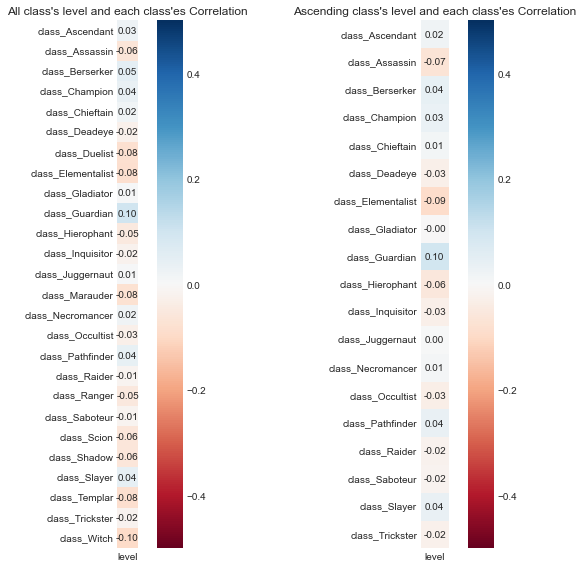

In [18]:
# dual subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 8))

# firts one
corr1 = df_deads_allonehot.corr().round(4)[['level']][1:]
sns.heatmap(data=corr1, cmap='RdBu', square=True, vmin=-0.5, vmax=0.5, ax=axes[0], annot_kws={"size": 10}, annot=True, fmt=".2f")
axes[0].set_title('All class\'s level and each class\'es Correlation')

# second one
corr2 = df_deads_aconehot.corr().round(4)[['level']][1:]
sns.heatmap(data=corr2, cmap='RdBu', square=True, vmin=-0.5, vmax=0.5, ax=axes[1], annot_kws={"size": 10}, annot=True, fmt=".2f")
axes[1].set_title('Ascending class\'s level and each class\'es Correlation')

# layouts
plt.tight_layout()
plt.show()

### result1: 
There are no significant differences between classes even if calculated only for Ascendancy classes. If there are classes that appear to exhibit a clear correlation with 'level,’ we can say that there’s a dependence. However, as anticipated, the only class with an absolute value exceeding 0.1 is the Guardian.

In this approach, categorical data was transformed into sparse data, given the multitude of classes, during the encoding process designed to examine its connection with continuous data. Consequently, this led to extremely small correlation coefficient values. **In other words, though there are variations in each correlation coefficient value, it is challenging to assert their meaningfulness, making it difficult to derive substantial results.**

Consequently, I carried out one-way ANOVA tests as I planned. If the mean of each class shows a substantial difference, we can say that there is dependence. On the flip side, we will need to reconsider _our hypothesis, that ‘class’ has a dependence on ‘level’_.

#### I haven't organized it on Notion yet
---

## 5-2. ANOVA test
---
### 5-2-1. distribution of level, normality test and skewness test

#### (1) distribution of level by classes

In [19]:
# sorting by Ascendant classes - root classes 
Asce_root_sort = list(df.loc[~df['class'].isin(rootclasses)]['class'].unique()) + rootclasses

# setting the format and view the classes' level distribution
pd.options.display.float_format = '{:,.2f}'.format
df_dead.groupby('class')[['level']].describe().reindex(Asce_root_sort)

level                                           
                count  mean   std   min   25%   50%   75%    max
class                                                           
Necromancer  2,712.00 80.91 12.74 53.00 70.00 88.50 91.00 100.00
Slayer       1,825.00 82.11 11.94 53.00 72.00 89.00 91.00 100.00
Deadeye        269.00 77.47 14.66 53.00 62.00 83.00 90.00  98.00
Gladiator    2,097.00 80.44 12.78 53.00 70.00 87.00 91.00 100.00
Inquisitor   1,306.00 79.10 12.95 53.00 68.00 84.00 90.00 100.00
Raider       1,216.00 79.54 13.77 53.00 68.00 89.00 91.00 100.00
Champion       509.00 83.22 11.31 53.00 75.00 89.00 91.00  99.00
Occultist      523.00 77.80 13.63 53.00 67.00 79.00 90.50 100.00
Pathfinder     373.00 84.02 12.91 53.00 76.00 90.00 92.00  98.00
Elementalist   442.00 72.78 13.31 53.00 60.00 71.00 89.00 100.00
Chieftain      913.00 81.35 12.20 53.00 70.00 89.00 91.00  99.00
Hierophant     755.00 76.89 12.50 53.00 67.00 76.00 89.00  98.00
Ascendant    1,380.00 81.55 12.80 53.00 71.00 89.00 91.00 100.00
Trickster    1,282.00 79.35 12.83 53.00 69.00 84.00 90.00 100.00
Guardian       448.00 88.85  9.67 53.00 90.00 91.00 94.00 100.00
Berserker    2,621.00 81.91 12.15 53.00 72.00 89.00 91.00 100.00
Juggernaut     881.00 80.64 12.29 53.00 70.00 86.00 91.00  99.00
Saboteur       483.00 79.11 13.29 53.00 68.00 84.00 91.00 100.00
Assassin       225.00 72.40 13.38 53.00 59.00 71.00 88.00  94.00
Duelist         49.00 58.98  5.27 53.00 55.00 57.00 62.00  71.00
Marauder        60.00 61.55  7.42 53.00 55.00 60.00 66.50  83.00
Ranger          22.00 58.91  5.04 53.00 55.25 57.50 60.75  70.00
Scion           32.00 60.34  7.82 53.00 55.75 58.00 62.25  89.00
Shadow          28.00 59.04  4.98 53.00 55.00 57.50 62.00  73.00
Templar         52.00 58.73  4.97 53.00 54.00 58.00 61.25  71.00
Witch           78.00 59.92  7.23 53.00 54.00 58.00 63.75  88.00

#### (2) Boxplot by class
Get a boxplot and compare their average and minimum, maximum.  
The pinkish colors <span style="color:hotpink">*__Ascendant classes__*</span> and the greenery colors mean <span style="color:limegreen">*__root classes__*</span>. 

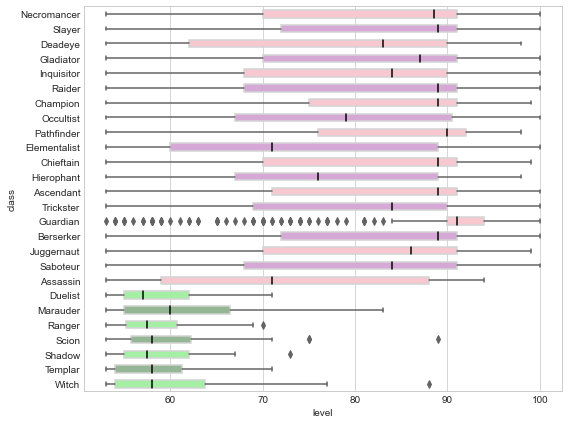

In [20]:
plt.figure(figsize = (8, 6))

# set the color order
color_palette = ['pink', 'plum'] * 9 + ['pink'] + ['palegreen', 'darkseagreen'] * 3 + ['palegreen']

# horizontal box plots with light colors 
sns.boxplot(x = df_dead['level'], y = df_dead['class'], order = Asce_root_sort, palette = color_palette, width = 0.5,
            boxprops = dict(edgecolor='lightgray'), medianprops = dict(color='black'))
plt.tight_layout()
plt.show()

##### Average and Boxplot results:

- There are fewer than 100 Root class characters in the rankings. It is noticeable that their highest level is less than 90 degrees. Really, their average level is only over 60 or less.  
Nevertheless, they were comparable to the higher level of Ascendancy classes where you could use more detailed, highly utilized skills.  

- One box's $Q_1$ is bigger than the other's $Q_3$, it has a difference between them without further discussion.  
And it really does, some classes whose average level is lower than others are smaller than others $Q_3$.

#### (3) Normality and skewness test: Shapiro-wilk test 

Some class has samples under 30(Ranger, Shadow), so I choose the Shapiro-wilk test.  

In [23]:
from scipy.stats import *

for cl in Asce_root_sort:
    # if it doesn't meet the normality then pass this 
    if shapiro(df_dead[df_dead['class'] == cl]['level'])[1] > 0.05:
        print(f'{cl} - Normality satisfied')
    # if it has under 2 skewness then pass this
    if abs(scipy.stats.skew(df_dead[df_dead['class'] == cl]['level'], bias = False)) > 2:
        print(f'{cl} - Skewness is over \n')

Guardian - Skewness is over 

Scion - Skewness is over 



##### Normality & skewness test results: 
Any class doesn't follow a normal distribution and **Guardian** and **Scion** has skewed.  

#### (4) Homoscedasticity test


In [26]:
# seperate and save the data by class
cl_vl_dict = {}
for class_label, class_data in df_dead.groupby('class'):
    cl_vl_dict[class_label] = class_data['level']

# Levene test
statistic, p_value = levene(*cl_vl_dict.values()) # send the values(data) in turn
print('Levene test: ', statistic, p_value)
# Fligner test
statistic, p_value = fligner(*cl_vl_dict.values())
print('Fligner test: ', statistic, p_value)

Levene test:  18.631784427117147 9.597742330362986e-82
Fligner test:  535.175634847063 3.8612549948345704e-97


#### Equal-Variance test results

All class's data satisfied equal variances.

아래는 수정 혹은 지워야 하는 부분 (아주 옛날 부분)

In [15]:
# dead
df_dead = df_hc.loc[df['dead'] == True][['class', 'level']]
df_dead

,class,level
15,Raider,100
24,Necromancer,100
32,Slayer,100
48,Occultist,100
77,Necromancer,99
...,...,...
59762,Juggernaut,53
59763,Slayer,89
59765,Berserker,53
59768,Necromancer,53


In [16]:
# Min-Max Scaling
Xmin = min(df_dead['level'])
Xmax = max(df_dead['level'])
scaled = (df_dead['level'] - Xmin) / (Xmax - Xmin)
df_dead['scaled_level'] = scaled
df_dead.head(5)

,class,level,scaled_level
15,Raider,100,1.00
24,Necromancer,100,1.00
32,Slayer,100,1.00
48,Occultist,100,1.00
77,Necromancer,99,0.98


#### get dummies

In [17]:
df_deads_onehot = pd.get_dummies(df_dead, drop_first = False)
df_deads_onehot.head(5)

,level,scaled_level,class_Ascendant,class_Assassin,class_Berserker,class_Champion,class_Chieftain,class_Deadeye,class_Duelist,class_Elementalist,...,class_Pathfinder,class_Raider,class_Ranger,class_Saboteur,class_Scion,class_Shadow,class_Slayer,class_Templar,class_Trickster,class_Witch
15,100,1.00,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
24,100,1.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32,100,1.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
48,100,1.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77,99,0.98,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 5-2. correlation

In [48]:
df_deads_onehot.corr().round(3)['level']

level                 1.00
scaled_level          1.00
class_Ascendant       0.03
class_Assassin       -0.06
class_Berserker       0.05
class_Champion        0.04
class_Chieftain       0.02
class_Deadeye        -0.02
class_Duelist        -0.08
class_Elementalist   -0.09
class_Gladiator       0.01
class_Guardian        0.10
class_Hierophant     -0.05
class_Inquisitor     -0.02
class_Juggernaut      0.01
class_Marauder       -0.08
class_Necromancer     0.02
class_Occultist      -0.03
class_Pathfinder      0.04
class_Raider         -0.01
class_Ranger         -0.05
class_Saboteur       -0.01
class_Scion          -0.06
class_Shadow         -0.06
class_Slayer          0.04
class_Templar        -0.08
class_Trickster      -0.02
class_Witch          -0.10
Name: level, dtype: float64

In [50]:
df_deads_onehot.corr(method = 'spearman').round(3)['scaled_level']

level                 1.00
scaled_level          1.00
class_Ascendant       0.03
class_Assassin       -0.06
class_Berserker       0.04
class_Champion        0.03
class_Chieftain       0.01
class_Deadeye        -0.02
class_Duelist        -0.07
class_Elementalist   -0.08
class_Gladiator      -0.00
class_Guardian        0.12
class_Hierophant     -0.06
class_Inquisitor     -0.03
class_Juggernaut      0.00
class_Marauder       -0.07
class_Necromancer     0.02
class_Occultist      -0.03
class_Pathfinder      0.05
class_Raider         -0.01
class_Ranger         -0.05
class_Saboteur       -0.01
class_Scion          -0.05
class_Shadow         -0.05
class_Slayer          0.04
class_Templar        -0.07
class_Trickster      -0.02
class_Witch          -0.08
Name: scaled_level, dtype: float64

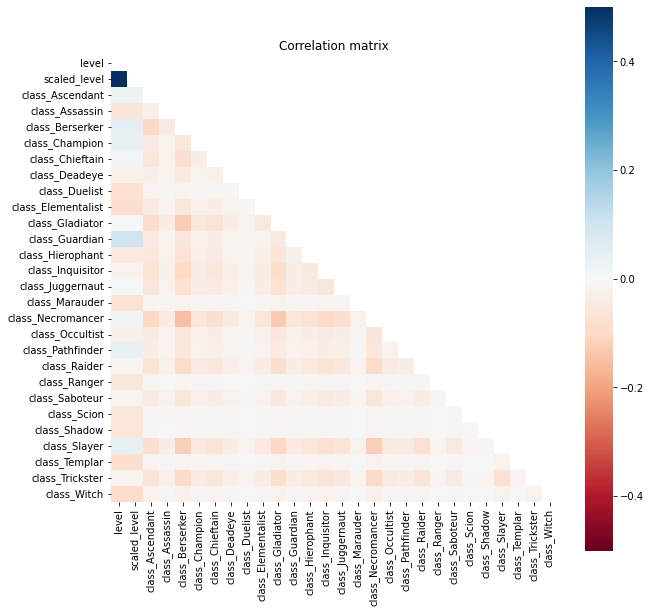

In [20]:
mask = np.zeros_like(df_deads_onehot.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (10, 10))
sns.heatmap(data = df_deads_onehot.corr(), cmap = 'RdBu', mask=mask, square = True, vmin = -0.5, vmax = 0.5)
plt.title('Correlation matrix')
plt.show()

### about correlation result:
That seems there's no correlation between the level and the class, but the data indeed became scarce data after getting dummies.  
In this case, we can use polyserial correlation analysis.

`stats.pointbiserialr` need bools array... 'biserial'... this is nominal...

In [ ]:
# from scipy.stats import pointbiserialr

# pointbiserialr(df_deads_onehot.loc[15, 'class_Ascendant':], df_deads_onehot.loc[15, 'scaled_level'])

## 5-3. Average level of each class 

### 5-3-1. Average level

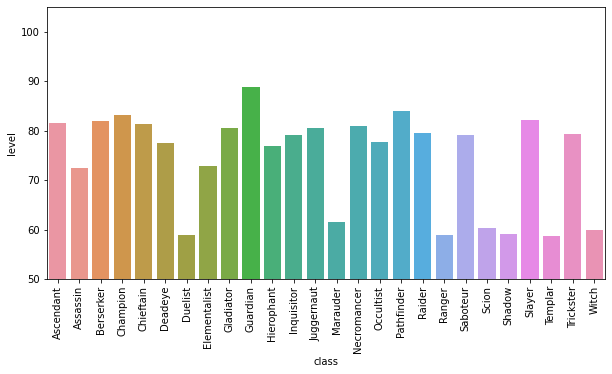

In [51]:
plt.rcParams['figure.figsize'] = (10,5)
plt.xticks(rotation = 90)
plt.ylim(50, 105)
df_hc_lev_mean = df_dead.groupby('class')[['level']].mean()
sns.barplot(data = df_hc_lev_mean, x = df_hc_lev_mean.index, y = 'level') # 신뢰구간 표시 못하나 그냥 boxplot그려야 하나
plt.show()

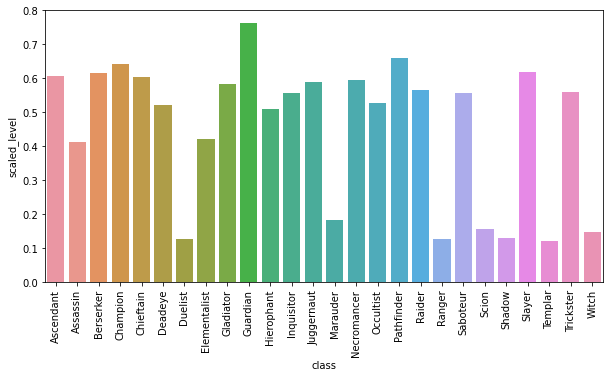

In [52]:
plt.rcParams['figure.figsize'] = (10,5)
plt.xticks(rotation = 90)
df_hc_lev_mean = df_dead.groupby('class')[['scaled_level']].mean()
sns.barplot(data = df_hc_lev_mean, x = df_hc_lev_mean.index, y = 'scaled_level')
plt.show()

아니 스케일링을 하는 이유가 없어지는데... 그냥 해야겠다. 다 지우고,,,, 그냥 기록만 남기고...

그래프를 보고 알 수 있는 것: 듀엘리스트, 머러더, 레인저, 사이온, 셰도우, 템플러, 위치는 평균 레벨이 현저히 낮다.  
아마 이 모든 클래스를 데리고 ANOVA를 하면 분명 다르다고 할 것이고, 전부 사후검정을 하게되면 이 클래스들에서 차이가 나타날 것이다.  
일부 클래스에서 낮은 것은 사실이나 이것이 꼭 레벨과 관련이 있다고 할 수 있는 것은 아니다.  
왜냐하면 이미 언급했듯, 이 모드의 최소 레벨은 53으로, 경험이 풍부한 사람이 부 캐릭터를 53까지 키워서 하드코어 모드에서 기록을 세웠을 가능성이 다분하며, 그 직업들이 하드코어모드에서 충분히 인기있는 클래스들이었다면 더욱더 이 시나리오가 맞을 가능성이 높다.   

그리고 해야할 것 
- 클래스별 평균 구하기
- 평균이 다른지 ANOVA 하기